In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

,x,y
0,10.913417,75.919083
1,10.916287,75.918402
2,10.917793,75.918148
3,10.920293,75.916692
4,10.920803,75.916032
...,...,...
102,11.230440,75.790052
103,11.232788,75.789367
104,11.234640,75.789085
105,11.263832,75.777360


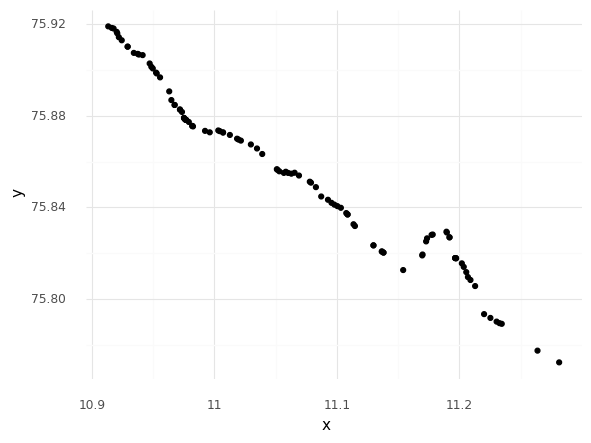

<ggplot: (110077455601)>

In [2]:
d1 = pd.read_csv("C:\\Users\\knaren1x\\OneDrive - Intel Corporation\\Documents\\Dvr\\dataset\\KA51ME7196\\Trip_13-9thsept-08_30-10_00\\latnlng.csv")
d2 = pd.read_csv("C:\\Users\\knaren1x\\OneDrive - Intel Corporation\\Documents\\Dvr\\dataset\\KA51ME7196\\Trip_13-9thsept-08_30-10_00\\latnlng.csv")
z = StandardScaler()
d2[['x','y']]

d1[["x","y"]] = z.fit_transform(d1)
display(d2)

ggplot(d2, aes(x = "x", y = "y")) + geom_point() + theme_minimal()


In [3]:
#kms_per_radian = 6371.0088
mts_per_radian = 6371.0088*1000
#epsilon = 1 / kms_per_radian
epsilon = 1000 / mts_per_radian
db = DBSCAN(eps=epsilon, min_samples=4, algorithm='ball_tree', metric='haversine').fit(np.radians(d2))



In [4]:
labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db.labels_)))]


In [5]:
d2["assignments"] = db.labels_

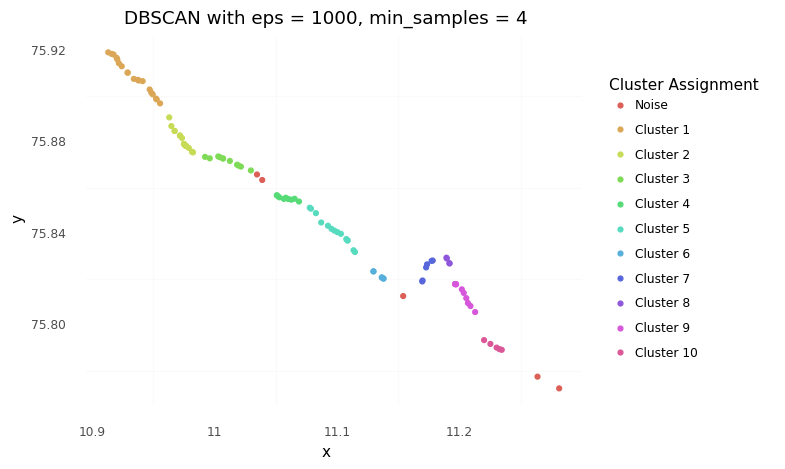

<ggplot: (110070660395)>

In [6]:
(ggplot(d2, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 1000, min_samples = 4"))

In [7]:
d1_clustered = d2.loc[(d2.assignments >= 0)]

silhouette_score(d1_clustered[["x","y"]], d1_clustered["assignments"])

0.6260633870510917

In [8]:
silhouette_score(d2[["x","y"]], d2["assignments"])

0.5597366676897619